In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
consumerKey = " "
consumerSecret = " "
accessToken = " "
accessTokenSecret = " "


In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [ ]:
posts = api.user_timeline(screen_name = "username",count = 100, lang ="en", tweet_mode ="extended" )

print("10 recent tweets \n")
i=1
for tweet in posts[0:10]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i=i+1


10 recent tweets 

1) “I stand on the shoulders of giants.”
Thank you, Rahulbhai, for letting me clamber up onto your broad shoulders, advising me, cheering me on, encouraging me to be bold. Your footprints on the sands of Indian Business will never be extinguished..
Om Shanti 🙏🏽 https://t.co/TOemOPvsEL

2) Will do.  👍🏽 https://t.co/KfJe9f4Wlc

3) It’s not inevitable that this will succeed commercially or be substantially profitable, but I still would feel proud to be an investor…Grateful if someone can connect me with Gursaurabh, (3/3) https://t.co/GsuzgJECTo

4) But what I appreciate most is his empathy and passion for those hard working people for whom the humble cycle is still the primary mode of transport. It’s a good reminder for all automakers focussing on disruptive EVs that THIS EV revolution may be the most important one. (2/3) https://t.co/ZyiqO2Crkv

5) This has been doing the #Signal rounds the last few days. Not the first device in the world to motorise a cycle. But this 

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df

,Tweets
0,“I stand on the shoulders of giants.”\nThank y...
1,Will do. 👍🏽 https://t.co/KfJe9f4Wlc
2,It’s not inevitable that this will succeed com...
3,But what I appreciate most is his empathy and ...
4,This has been doing the #Signal rounds the las...
...,...
95,"Take a bow, Team @TractorMahindra Nagpur…👏🏽👏🏽👏..."
96,हमारी नागपुर टीम द्वारा निर्मित.. गणतंत्र दिवस...
97,This gets my vote for the best float in today’...
98,RT @MahindraElctrc: An all-electric #RepublicD...


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'_', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df


,Tweets
0,“I stand on the shoulders of giants.”\nThank y...
1,Will do. 👍🏽 https//t.co/KfJe9f4Wlc
2,It’s not inevitable that this will succeed com...
3,But what I appreciate most is his empathy and ...
4,This has been doing the Signal rounds the last...
...,...
95,"Take a bow, Team Nagpur…👏🏽👏🏽👏🏽 https//t.co/f0..."
96,हमारी नागपुर टीम द्वारा निर्मित.. गणतंत्र दिवस...
97,This gets my vote for the best float in today’...
98,An all-electric RepublicDay women's auto ral...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)    
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,“I stand on the shoulders of giants.”\nThank y...,0.489583,0.197917
1,Will do. 👍🏽 https//t.co/KfJe9f4Wlc,0.000000,0.000000
2,It’s not inevitable that this will succeed com...,0.666667,0.266667
3,But what I appreciate most is his empathy and ...,0.577381,0.286905
4,This has been doing the Signal rounds the last...,0.375000,0.260000
...,...,...,...
95,"Take a bow, Team Nagpur…👏🏽👏🏽👏🏽 https//t.co/f0...",0.000000,0.000000
96,हमारी नागपुर टीम द्वारा निर्मित.. गणतंत्र दिवस...,0.000000,0.000000
97,This gets my vote for the best float in today’...,0.368333,0.258750
98,An all-electric RepublicDay women's auto ral...,0.000000,0.000000


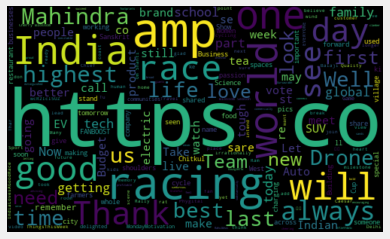

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show() 

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'    

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df


,Tweets,Subjectivity,Polarity,Analysis
0,“I stand on the shoulders of giants.”\nThank y...,0.489583,0.197917,Positive
1,Will do. 👍🏽 https//t.co/KfJe9f4Wlc,0.000000,0.000000,Neutral
2,It’s not inevitable that this will succeed com...,0.666667,0.266667,Positive
3,But what I appreciate most is his empathy and ...,0.577381,0.286905,Positive
4,This has been doing the Signal rounds the last...,0.375000,0.260000,Positive
...,...,...,...,...
95,"Take a bow, Team Nagpur…👏🏽👏🏽👏🏽 https//t.co/f0...",0.000000,0.000000,Neutral
96,हमारी नागपुर टीम द्वारा निर्मित.. गणतंत्र दिवस...,0.000000,0.000000,Neutral
97,This gets my vote for the best float in today’...,0.368333,0.258750,Positive
98,An all-electric RepublicDay women's auto ral...,0.000000,0.000000,Neutral


In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1




1)“I stand on the shoulders of giants.”
Thank you, Rahulbhai, for letting me clamber up onto your broad shoulders, advising me, cheering me on, encouraging me to be bold. Your footprints on the sands of Indian Business will never be extinguished..
Om Shanti 🙏🏽 https//t.co/TOemOPvsEL

2)It’s not inevitable that this will succeed commercially or be substantially profitable, but I still would feel proud to be an investor…Grateful if someone can connect me with Gursaurabh, (3/3) https//t.co/GsuzgJECTo

3)But what I appreciate most is his empathy and passion for those hard working people for whom the humble cycle is still the primary mode of transport. It’s a good reminder for all automakers focussing on disruptive EVs that THIS EV revolution may be the most important one. (2/3) https//t.co/ZyiqO2Crkv

4)This has been doing the Signal rounds the last few days. Not the first device in the world to motorise a cycle. But this is a)  An outstanding design—compact &amp; efficient b) Rugged-loved

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1


1)Building a global, ‘neural’ network is difficult but exciting…A  owned Turkish tractor company building a brand and earning the goodwill of farmers in Côte d’Ivoire, West Africa… https//t.co/20JDckkqDl

2)The Wall. From the Game of the Thrones.. So it does exist…🙂 https//t.co/5up7B3dncI

3)Would be absurd to look any further for MondayMotivation I’m going to store this video and replay it—sometimes on a loop—to remind myself that there is NO hole too deep to climb out of; NO challenge that is too intimidating to be faced. Thank you Sport Thank you  https//t.co/cdaL9C9xFv

4)   Well while they call life a rat race I hate rats but love speed!I remember in schools we us…



Text(0, 0.5, 'Subjectivity')

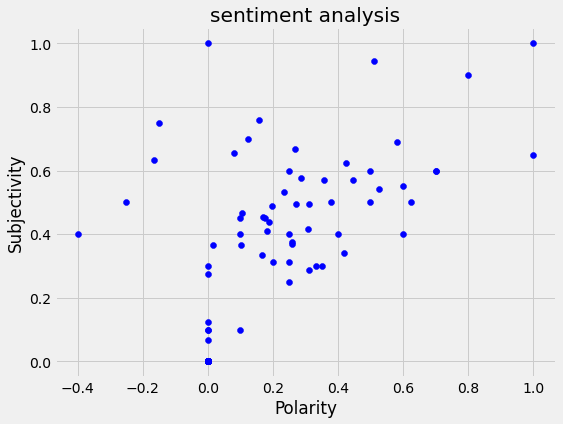

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('sentiment analysis')
plt.xlabel('Polarity')  
plt.ylabel('Subjectivity')


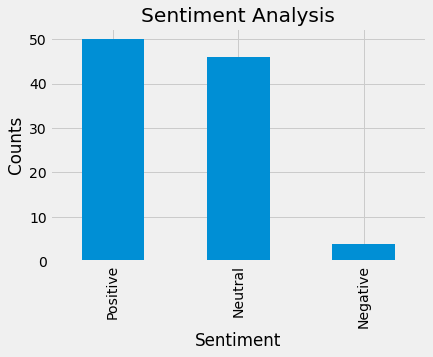

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
